In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df.dropna(axis=0, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [8]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df.set_index('Month', inplace=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [13]:
df.to_csv('dataset.csv', index=False)

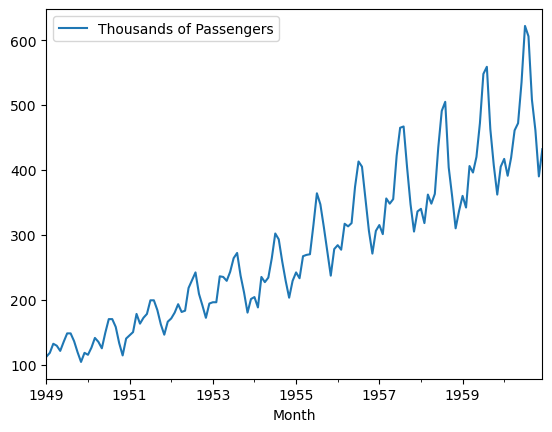

In [ ]:
df.plot()
plt.show();
df

converting seasonal trend of dataset to stationary using dickey fuller test

In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root, data is not stationary")

In [17]:
adf_test(df['Thousands of Passengers'])

ADF Statistics: 0.8153688792060371
p- value: 0.9918802434376408
Weak evidence against the null hypothesis, time series has a unit root, data is not stationary


In [ ]:
# Technique called differencing
df['Passengers First Differences'] = df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [19]:
df.head()

,Thousands of Passengers,Passengers First Differences
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [20]:
adf_test(df['Passengers First Differences'].dropna())

ADF Statistics: -2.829266824169981
p- value: 0.05421329028382793
Weak evidence against the null hypothesis, time series has a unit root, data is not stationary


In [21]:
df['Passengers Second Differences'] = df['Passengers First Differences']-df['Passengers First Differences'].shift(1)

In [22]:
adf_test(df['Passengers Second Differences'].dropna())

ADF Statistics: -16.384231542468505
p- value: 2.73289185001424e-29
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
## for seasonal data we are going to do 12 times
df['Passengers 12 Differences'] = df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)


In [24]:
df.head()

,Thousands of Passengers,Passengers First Differences,Passengers Second Differences,Passengers 12 Differences
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [25]:
adf_test(df['Passengers 12 Differences'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514954
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


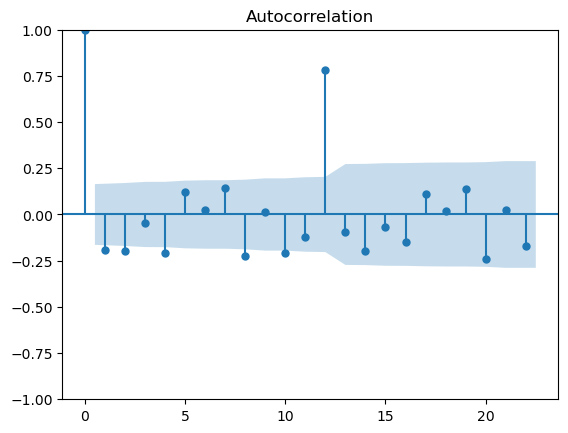

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(df['Passengers Second Differences'].dropna())
plt.show();

q value is 7.

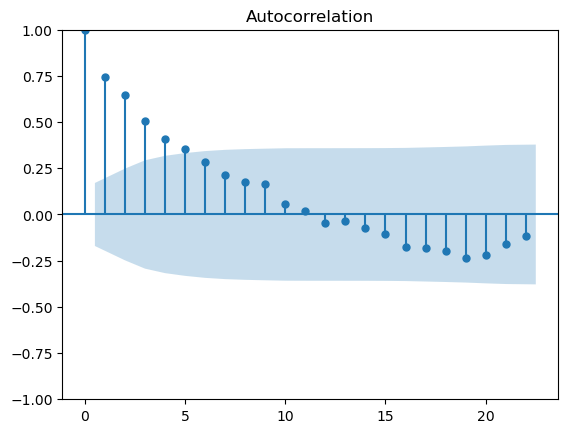

In [30]:
acf12 = plot_acf(df['Passengers 12 Differences'].dropna())
plt.show()

q value is taken as 5.

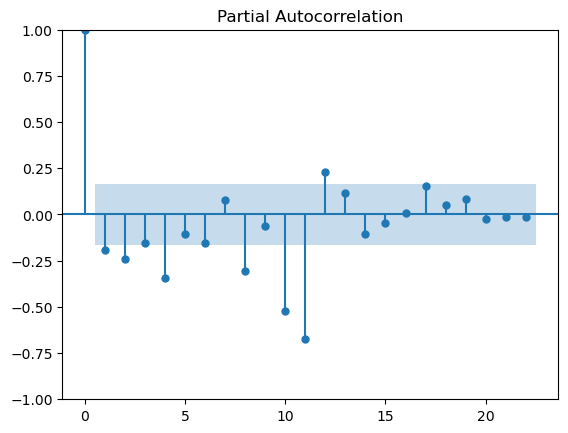

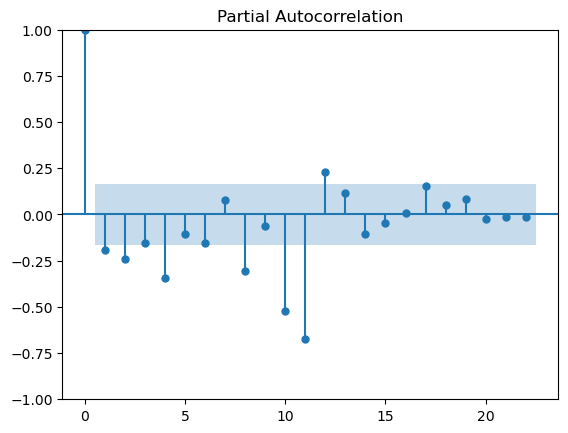

In [32]:
pacf = plot_pacf(df['Passengers Second Differences'].dropna())
plt.show();

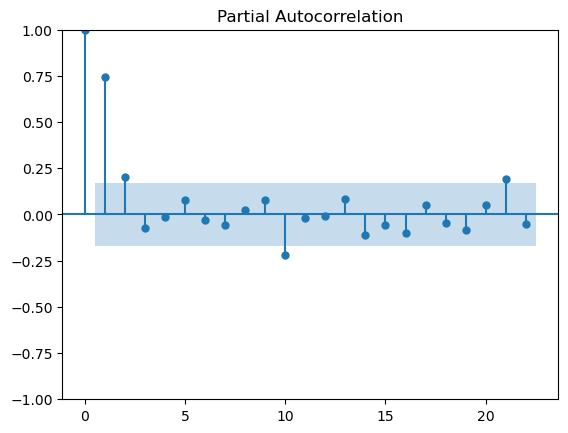

In [33]:
acf12 = plot_pacf(df['Passengers 12 Differences'].dropna())
plt.show()

Here, p = 2.

In [34]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955, 12, 1)
test_dataset_end = datetime(1960, 12, 1)

In [35]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [36]:
## prediction
pred_start_date = test_data.index[0]
pred_end_date= test_data.index[-1]

In [37]:
test_data

,Thousands of Passengers,Passengers First Differences,Passengers Second Differences,Passengers 12 Differences
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [ ]:
train_data

,Thousands of Passengers,Passengers First Differences,Passengers Second Differences,Passengers 12 Differences
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [40]:
from statsmodels.tsa.arima.model import ARIMA

model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(10, 2, 12))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
model_ARIMA_fir = model_ARIMA.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
model_ARIMA_fir.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 12)   Log Likelihood                -307.733
Date:                     Thu, 24 Jul 2025   AIC                            661.465
Time:                             06:05:00   BIC                            716.820
Sample:                         01-01-1949   HQIC                           683.689
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0468      0.115      0.408      0.683      -0.178       0.271
ar.L2         -1.0429      0.084    -12.487      0.000      -1.207      -0.879
ar.L3          0.0886      0.139      0.639      0.523      -0.183       0.360
ar.L4         -1.0259      0.131     -7.831      0.000      -1.283      -0.769
ar.L5          0.0658      0.155      0.423      0.672      -0.239       0.370
ar.L6         -0.9861      0.143     -6.884      0.000      -1.267      -0.705
ar.L7          0.0175      0.142      0.123      0.902      -0.261       0.296
ar.L8         -0.9822      0.122     -8.030      0.000      -1.222      -0.743
ar.L9         -0.0069      0.095     -0.073      0.942      -0.193       0.179
ar.L10        -0.9389      0.085    -11.095      0.000      -1.105      -0.773
ma.L1         -1.2855      0.254     -5.058      0.000      -1.784      -0.787
ma.L2          1.2392      0.358      3.457      0.001       0.537       1.942
ma.L3         -1.4413      0.436     -3.304      0.001      -2.296      -0.586
ma.L4          1.3757      0.507      2.716      0.007       0.383       2.369
ma.L5         -1.2160      0.574     -2.117      0.034      -2.342      -0.090
ma.L6          1.0827      0.660      1.641      0.101      -0.211       2.376
ma.L7         -1.0698      0.714     -1.497      0.134      -2.470       0.331
ma.L8          0.8857      0.819      1.082      0.279      -0.719       2.490
ma.L9         -0.7848      0.736     -1.066      0.287      -2.228       0.658
ma.L10         0.5230      0.601      0.870      0.384      -0.655       1.701
ma.L11        -0.4129      0.455     -0.908      0.364      -1.304       0.478
ma.L12         0.1334      0.273      0.489      0.625      -0.402       0.669
sigma2        77.2234     16.206      4.765      0.000      45.461     108.986
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [44]:
pred = model_ARIMA_fir.predict(start=pred_start_date, end=pred_end_date)
residuals=test_data['Thousands of Passengers'] -pred

In [45]:
residuals

Month
1956-01-01      0.742818
1956-02-01      7.472376
1956-03-01     21.804990
1956-04-01     14.403325
1956-05-01     18.891731
1956-06-01     28.638264
1956-07-01     24.514481
1956-08-01     33.115761
1956-09-01     14.925417
1956-10-01      3.105715
1956-11-01     -0.799568
1956-12-01      3.374972
1957-01-01      3.909286
1957-02-01      7.182069
1957-03-01     39.026011
1957-04-01     23.470867
1957-05-01     28.885872
1957-06-01     49.291442
1957-07-01     50.443688
1957-08-01     70.454960
1957-09-01     38.725242
1957-10-01     14.784950
1957-11-01      2.502032
1957-12-01      6.552284
1958-01-01      1.446476
1958-02-01     -0.409054
1958-03-01     23.035996
1958-04-01     -2.535466
1958-05-01      9.753318
1958-06-01     35.418480
1958-07-01     50.508955
1958-08-01     83.713323
1958-09-01     13.356023
1958-10-01     -2.564177
1958-11-01    -23.152043
1958-12-01    -19.274901
1959-01-01     -5.699958
1959-02-01     -1.271892
1959-03-01     44.802902
1959-04-01     19.4

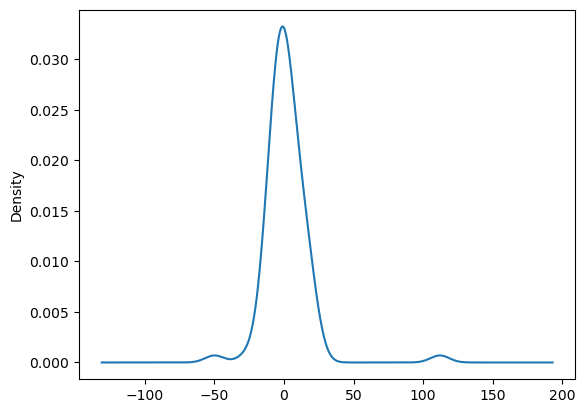

In [46]:
model_ARIMA_fir.resid.plot(kind='kde')
plt.show()

In [61]:
test_data['Predicted_ARIMA'] = pred

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_71988/284031954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


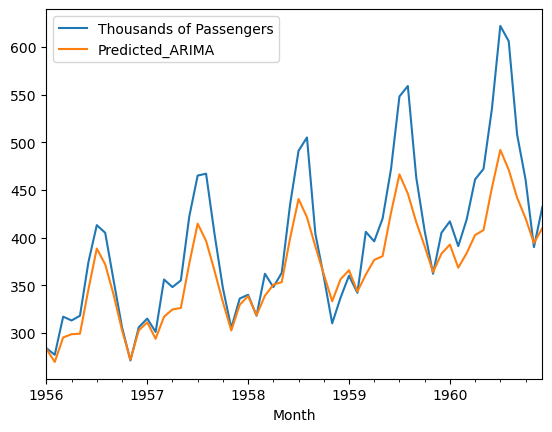

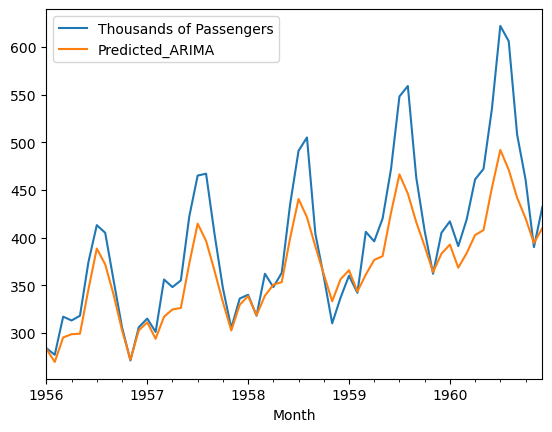

In [63]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot()
plt.show()

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima=SARIMAX(train_data['Thousands of Passengers'],order=(3, 0, 5), seasonal_order=(1,1,0,12))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [49]:
model_SARIMA_fit = model_sarima.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19317D+00    |proj g|=  5.08695D-02

At iterate    5    f=  3.17407D+00    |proj g|=  8.98775D-03

At iterate   10    f=  3.17102D+00    |proj g|=  2.14447D-03

At iterate   15    f=  3.16818D+00    |proj g|=  5.35420D-02

At iterate   20    f=  3.15604D+00    |proj g|=  2.58431D-02

At iterate   25    f=  3.15310D+00    |proj g|=  1.93012D-03

At iterate   30    f=  3.15236D+00    |proj g|=  5.22478D-02

At iterate   35    f=  3.14840D+00    |proj g|=  1.30111D-02

At iterate   40    f=  3.14395D+00    |proj g|=  1.03389D-02

At iterate   45    f=  3.14199D+00    |proj g|=  5.57714D-03

At iterate   50    f=  3.14184D+00    |proj g|=  1.08457D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 1, [1], 12)   Log Likelihood                -263.915
Date:                              Thu, 24 Jul 2025   AIC                            549.829
Time:                                      06:28:31   BIC                            574.872
Sample:                                  01-01-1949   HQIC                           559.799
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5573      3.277      0.170      0.865      -5.866       6.981
ar.L2          0.8513      0.380      2.242      0.025       0.107       1.595
ar.L3         -0.4197      2.984     -0.141      0.888      -6.268       5.429
ma.L1          0.2044      3.193      0.064      0.949      -6.054       6.463
ma.L2         -0.5151      2.361     -0.218      0.827      -5.143       4.113
ma.L3         -0.0934      0.687     -0.136      0.892      -1.439       1.253
ma.L4         -0.1883      0.525     -0.359      0.720      -1.217       0.841
ma.L5          0.1674      0.895      0.187      0.852      -1.587       1.922
ar.S.L12      -0.3129      0.859     -0.364      0.716      -1.996       1.370
ma.S.L12       0.1038      0.945      0.110      0.913      -1.748       1.956
sigma2        84.0430     31.418      2.675      0.007      22.464     145.622
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.91   Prob(JB):                         0.39
Heteroskedasticity (H):               2.41   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
test_data.tail()

,Thousands of Passengers,Passengers First Differences,Passengers Second Differences,Passengers 12 Differences
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


In [53]:

##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [54]:

pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

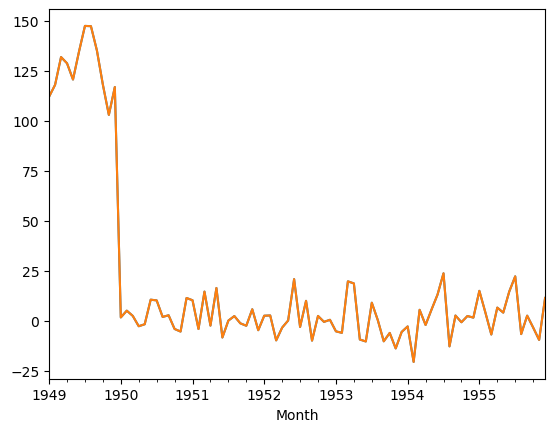

In [56]:
model_SARIMA_fit.resid.plot()
plt.show()

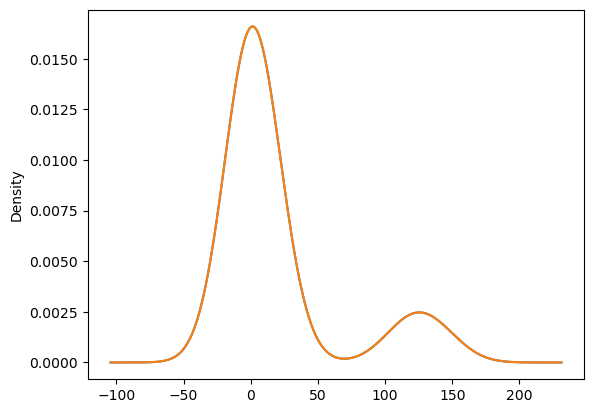

In [58]:
model_SARIMA_fit.resid.plot(kind='kde')
plt.show();

In [59]:

test_data['Predicted_SARIMA']=pred_Sarima

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_71988/1613937938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


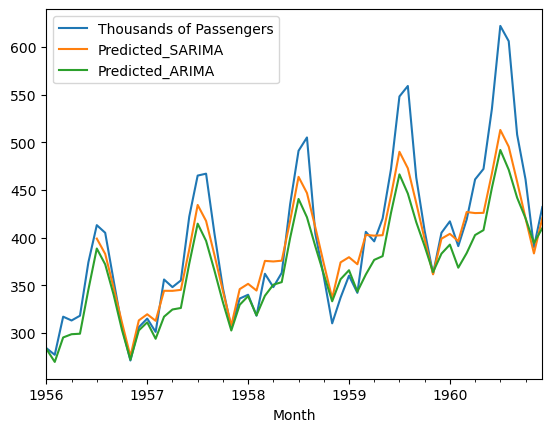

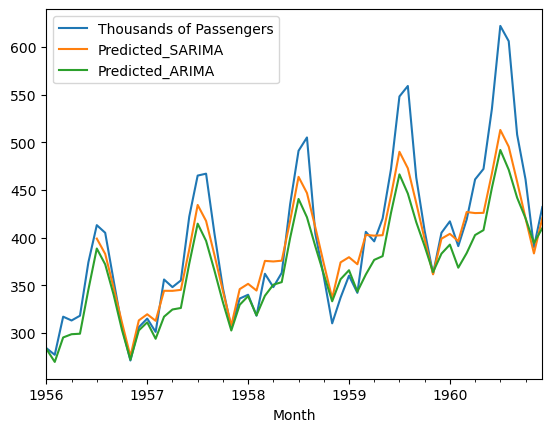

In [66]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()
plt.show()